<img src="https://cdn-images-1.medium.com/max/1600/1*OIIv4FEjJQMqh-zEPhtlYA.png" style="width: 750px;"/>

# Introduction

From google playstore dataset, I decide to make some simple notebook for Exploratory Data Analysis
and do some wrangling data for put it on my prediction model in future 

# Import libraries

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph.
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
%matplotlib inline

# Data Collection

Data collection is the process of gathering and measuring data, information or any variables of interest in a standardized and established manner that enables the collector to answer or test hypothesis and evaluate outcomes of the particular collection.[techopedia]

In [3]:
## Read file


data = pd.read_csv('googleplaystore/googleplaystore.csv')
x=data
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


* App: Application name
* Category: Category the app belongs to
* Rating: Overall user rating of the app (as when scraped)
* Reviews: Number of user reviews for the app (as when scraped)
* Size: Size of the app (as when scraped)
* Installs: Number of user downloads/installs for the app (as when scraped)
* Type: Paid or Free
* Price: Price of the app (as when scraped)
* Content Rating: Age group the app is targeted at - Children / Mature 21+ / Adult
* Genres: An app can belong to multiple genres (apart from its main category). For eg, a musical family game will belong to Music, Game, Family genres.
* Last Updated: Date when the app was last updated on Play Store (as when scraped)
* Current Ver: Current version of the app available on Play Store (as when scraped)
* Android Ver: Min required Android version (as when scraped)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [5]:
data.shape

(10841, 13)

Here we use pandas profilling to analyse whole set of data.
Pandas profiling provides analysis like type, unique values, missing values, quantile statistics, mean, mode, median, standard deviation, sum, skewness, frequent values, histograms, correlation between variables, count, heatmap visualization, etc.

In [6]:
import pandas_profiling
pandas_profiling.ProfileReport(data)

ModuleNotFoundError: No module named 'pandas_profiling'

In [7]:
data.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

#### while preprocessing and viewing the data we observe that in this Datasets the maximum rating of an app is 19 which is not posible yet,we know that the maximum rating of an app in the google play store is 5. >>so we confenditly says that something wrong.

In [8]:
data[data['Rating'] == 19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


By viewing this we say that in this row all data are placed wrong by one position so we shift the data to the right hand size and make correct position.

In [9]:
data.iloc[10472,1:] = data.iloc[10472,1:].shift(1)
data[10471:10473]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10472,Life Made WI-Fi Touchscreen Photo Frame,NaN,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up


##### >>By shifting the row right by 1 we get actual value of rating
###### >>We see that the app 'Life Made WI-Fi Touchscreen Photo Frame' does not have any category,when we search this app on play store we found that it belong to lifestyle category.

<img src="https://www.picclickimg.com/d/l400/pict/323278941996_/Life-Made-Wi-Fi-Digital-Touch-Screen-7-Picture-Frame.jpg" style="width: 550px;"/>


Here we added 2 more columns in the data set by spliting the last updated attribute, by doing this we find that in which year apps are added or updated on playstore.

In [10]:
data["Last Updated"] = pd.to_datetime(data['Last Updated'])
data['year_added']=data['Last Updated'].dt.year
data['month_added']=data['Last Updated'].dt.month

In [11]:
data.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1


## Data Visualization

In [12]:
data.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'year_added', 'month_added'],
      dtype='object')

## Type

In [13]:
import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
col = "Type"
grouped = data[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Target(0 = No, 1 = Yes)'}
fig = go.Figure(data = [trace], layout = layout)
iplot(fig)

Here we see that 92.6% apps are freee and 7.38% apps are paid on google playstore. so we say that Most of the people love free services including me :)

In [14]:
d1=x[x['Type']=='Free']
d2=x[x['Type']=='Paid']

In [15]:
col='year_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"app udated or added over the years",'xaxis':{'title':"years"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In the above plot we plot the app updated or added over the year Free vs Paid. By observing this plot we conclude that before 2011 there were no paid apps (after that google thinks that people have lots of money so why not take some charge for some apps >> just for fun ).
But with the year free apps are added in huge ammount in comparision to paid apps --> people does not like paid services.
> By compairing the app updated or added in the year 2011 and 2018 free apps are increases from 80% to 96% and paid apps are goes from 20% to 4%.


**SEE!!** told you already that people like free service more than paid service.

### Why google like month of **July** most !?

In [16]:
col='month_added'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In this google playstore data Almost 50% apps are available on the playstore are added or updated on the month of July, 25% of apps are updated or added on the month of August and rest of 25% remaing months. (please don't ask me the reason i don't know !!) .

In [17]:
col='month_added'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid", marker=dict())
layout={'title':"Paid App added over the month",'xaxis':{'title':"months"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

## Is Google Bias ??

In [18]:

col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

No google is not bias beacuse they consider all of us proof!! --> see the above plot most of the app content rating rating are for everyone and most of them are Free.

In [19]:
col='Content Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Content Rating ",'xaxis':{'title':"Contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [20]:
col='Content Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="aid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Content Rating",'xaxis':{'title':"contents"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [21]:

col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.astype(str).sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Ratings of the free vs paid app",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

Most important things about apps are there rating we even didn't see the app's whose ratings are less than 3.5 . Before downloading the app first we see the rating of app if the app rating is more then 4 than we say that yeah this is a good category of app then after we see other attribute of apps. Very less people see the review's of app. My personal observation is that some of the good people who are pationate about the technology and have enough time give the review of app. (**we are data scientist and our maximum time goes in the cleaning of data**).

In [22]:
col='Rating'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
trace1 = go.Bar(x=v1[col], y=v1["count"], name="Free", marker=dict())
layout={'title':"Free App Rating",'xaxis':{'title':"Ratings"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [23]:
col='Rating'
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v2[col], y=v2["count"], name="Paid",  marker=dict(color="#6ad49b"))
layout={'title':"Paid App Rating",'xaxis':{'title':"Ratingss"}}
fig = go.Figure(data=[trace1], layout=layout)
iplot(fig)

In [24]:

col='Category'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"App Category"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

We already discuss about the category of the apps that most of the apps are belongs to the category of Family Game and Tools. --> 2nd most category of apps are **Games** kids now these days!!!

In [25]:
col='Android Ver'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Android Versions"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [26]:
col='Installs'
v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="Free", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="Paid", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Installed App ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

By ovserving the above plot highest installs of the apps are crossing the 1M than 10M than 100k, very less app are crossing the 500M and dream install **1B** .
some apps like Instagram, Youtoube, Facebook Whtsapp etc are crossing the dream installs 1B.

## Rating

In [27]:
d3=x[x['Rating']==4.5]
d4=x[x['Rating']==4]

In [28]:
col='Content Rating'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#6ad49b"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Rating over the contents",'xaxis':{'title':"Content Rating"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [29]:
col='Android Ver'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Rating over the Android Version "}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [30]:
col='Category'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Bar(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Bar(x=v2[col], y=v2["count"], name="rating = 4", marker=dict())
y = [trace1, trace2]
layout={'title':"Category wise Rating"}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

In [31]:
col='Installs'
v1=d3[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d4[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1 = go.Scatter(x=v1[col], y=v1["count"], name="rating = 4.5", marker=dict(color="#a678de"))
trace2 = go.Scatter(x=v2[col], y=v2["count"], name="rating = 4", marker=dict(color="#6ad49b"))
y = [trace1, trace2]
layout={'title':"Rating over total Installs ",'xaxis':{'title':"Installs"}}
fig = go.Figure(data=y, layout=layout)
iplot(fig)

## Data Cleaning

###### >>here we comparing with other and see the difference

In [32]:
data.isnull().sum().sum()

1487

In [33]:
total=data.isnull().sum()
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(13)

,Total,Percent
App,0,0.000000
Category,1,0.000092
Rating,1474,0.135965
Reviews,0,0.000000
Size,0,0.000000
Installs,0,0.000000
Type,1,0.000092
Price,0,0.000000
Content Rating,0,0.000000
Genres,1,0.000092


In [34]:
data.dropna(inplace=True)

In [35]:
data.shape

(9360, 15)

###### >>initialy our data contain 10841 records and 13 fields here we see after removing missing data our data contain 9360 records with 13 fields.

## Creating Dummy Variables

### Type

In [36]:
data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,year_added,month_added
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018,1
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018,1
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018,8


In [37]:
catgry=pd.get_dummies(data['Category'],prefix='catg',drop_first=True)
typ=pd.get_dummies(data['Type'],prefix='typ',drop_first=True)
cr=pd.get_dummies(data['Content Rating'],prefix='cr',drop_first=True)
frames=[data,catgry,typ,cr]
data=pd.concat(frames,axis=1)
data.drop(['Category','Installs','Type','Content Rating'],axis=1,inplace=True)

In [38]:
data.drop(['App','Size','Price','Genres','Last Updated','Current Ver','Android Ver'],axis=1,inplace=True)

In [39]:
data.head(3)

,Rating,Reviews,year_added,month_added,catg_AUTO_AND_VEHICLES,catg_BEAUTY,catg_BOOKS_AND_REFERENCE,catg_BUSINESS,catg_COMICS,catg_COMMUNICATION,...,catg_TOOLS,catg_TRAVEL_AND_LOCAL,catg_VIDEO_PLAYERS,catg_WEATHER,typ_Paid,cr_Everyone,cr_Everyone 10+,cr_Mature 17+,cr_Teen,cr_Unrated
0,4.1,159,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,967,2018,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,87510,2018,8,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## Feature selection

### >> Xstant=X-mean(X)/st.dev(X)

### >> Xnorm=X-min(X)/max(X)-min(X)

In [40]:
X=data.drop('Rating',axis=1)
y=data['Rating'].values
y=y.astype('int')

##### >> Spliting the 80% of the dataset into train_data and 20% of the dataset into test_data

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

##### >> StandardScaler will transform your data such that its distribution will have a mean value 0 and standard deviation of 1. Given the distribution of the data, each value in the dataset will have the sample mean value subtracted, and then divided by the standard deviation of the whole dataset.

In [44]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)

## Training & Testing of Model

Logestic Regression
> Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).


In [45]:
#LogisticRegression
lr_c=LogisticRegression(random_state=0)
lr_c.fit(X_train,y_train)
lr_pred=lr_c.predict(X_test)
lr_cm=confusion_matrix(y_test,lr_pred)
lr_ac=accuracy_score(y_test, lr_pred)
print('LogisticRegression_accuracy:',lr_ac)

LogisticRegression_accuracy: 0.7622863247863247


D:\Program Files\ana\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



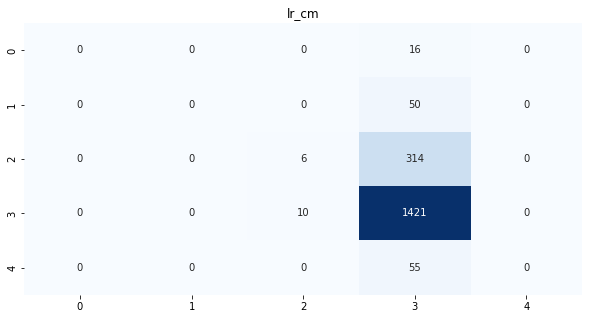

In [46]:
plt.figure(figsize=(10,5))
plt.title("lr_cm")
sns.heatmap(lr_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
plt.show()

DecisionTree Classifier
> A decision tree classifier is a tree in which internal nodes are labeled by features. ... The classifier categorizes an object xi by recursively testing for the weights that the features labeling the internal nodes have in vector xi, until a leaf node is reached. The label of this node is then assigned to xi

In [47]:
# DecisionTree Classifier
dtree_c=DecisionTreeClassifier(criterion='entropy',random_state=0)
dtree_c.fit(X_train,y_train)
dtree_pred=dtree_c.predict(X_test)
dtree_cm=confusion_matrix(y_test,dtree_pred)
dtree_ac=accuracy_score(dtree_pred,y_test)

DecisionTree_Classifier_accuracy: 0.6853632478632479


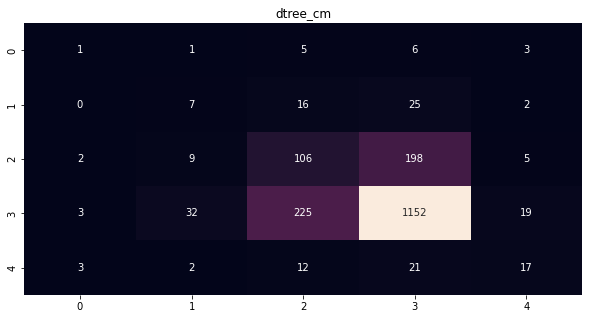

In [48]:
plt.figure(figsize=(10,5))
plt.title("dtree_cm")
sns.heatmap(dtree_cm,annot=True,fmt="d",cbar=False)
print('DecisionTree_Classifier_accuracy:',dtree_ac)

SVM regressor
>  As the name suggest the SVR is an regression algorithm , so we can use SVR for working with continuous Values instead of Classification which is SVM

In [46]:
#SVM regressor
svc_r=SVC(kernel='rbf')
svc_r.fit(X_train,y_train)
svr_pred=svc_r.predict(X_test)
svr_cm=confusion_matrix(y_test,svr_pred)
svr_ac=accuracy_score(y_test, svr_pred)

In [47]:
plt.figure(figsize=(10,5))
plt.title("svm_cm")
sns.heatmap(svr_cm,annot=True,cmap="Oranges",fmt="d",cbar=False)
print('SVM_regressor_accuracy:',svr_ac)

SVM_regressor_accuracy: 0.7649572649572649


RandomForest
> The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [48]:
#RandomForest
rdf_c=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rdf_c.fit(X_train,y_train)
rdf_pred=rdf_c.predict(X_test)
rdf_cm=confusion_matrix(y_test,rdf_pred)
rdf_ac=accuracy_score(rdf_pred,y_test)

In [49]:
plt.figure(figsize=(10,5))
plt.title("rdf_cm")
sns.heatmap(rdf_cm,annot=True,cmap="Blues",fmt="d",cbar=False)
print('RandomForest_accuracy:',rdf_ac)

RandomForest_accuracy: 0.7355769230769231


###  Models comparision
> The key to a fair comparison of machine learning algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. In this notebbok 4 different algorithms are compared

Text(0.5, 1.0, 'Model Accracy')

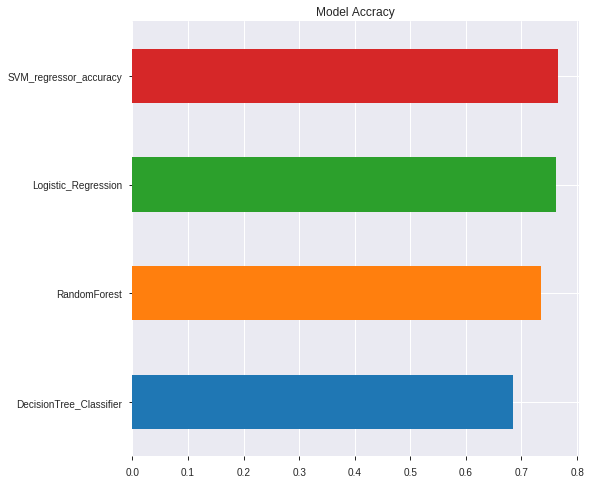

In [50]:
%matplotlib inline
model_accuracy = pd.Series(data=[lr_ac,dtree_ac,svr_ac,rdf_ac], 
        index=['Logistic_Regression','DecisionTree_Classifier','SVM_regressor_accuracy','RandomForest'])
fig= plt.figure(figsize=(8,8))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')

## Summary

In this notebook we use pandas, numpy, pandas profiling for data preprocessiong and for visualization we use matplotlib, seaborn and mostly plotly. By working on the google playstore data we conclude that most of the apps are free and their category are related to family, gaming and certains tools. Most of the content of these apps are for everyone. Most of the people pay for the category of family and medical apps. Here we use different machine learning model to predict the app ratings and also compare the model performence.

## I hope this kernel is helpfull for you -->> upvote will appreciate me for further work.

### Work IN Progress